In [2]:
'''
损失函数


均方误差

E = 1/2 SUM (Yk-Tk)^2

'''

import numpy as np 


def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)


# 设“2”为正确解
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]


# 例1：“2”的概率最高的情况（0.6）
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

mean_squared_error(np.array(y), np.array(t))

0.09750000000000003

In [3]:
# 例2：“7”的概率最高的情况（0.6）
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t))

# 这个的损失值比较高，说明与答案相去甚远

0.5975

In [5]:


# 交叉熵误差

'''

E = - SUM( Tk logYk ) 


Tk 和 Yk 都是 0.0 -- 1.0 之间的值
如果 Tk 和 Yk 都是 1 那么 Tk LogYk 就等于 0
如果 Tk 是 1, Yk 是 0.2 , 那么 Tk LogYk 相乘就是一个很大的值

这里，参数y和t是NumPy数组。函数内部在计算np.log时，加上了一
个微小值delta。这是因为，当出现np.log(0)时，np.log(0)会变为负无限大
的-inf，这样一来就会导致后续计算无法进行。作为保护性对策,
添加一个微小值可以防止负无限大的发生。


'''

def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

cross_entropy_error(np.array(y), np.array(t))

# 这个误差比较小
#  

0.510825457099338

In [6]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

# 这个误差比较大


2.302584092994546

In [7]:
'''
神经网络的学习也是从训练数据中选出一批数据（称为mini-batch,小
批量），然后对每个mini-batch进行学习。比如，从60000个训练数据中随机
选择100笔，再用这100笔数据进行学习。这种学习方式称为mini-batch学习。

'''

import sys, os
import numpy as np
from dataset.mnist import load_mnist
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
print(x_train.shape) # (60000, 784)
print(t_train.shape) # (60000, 10)


(60000, 784)
(60000, 10)


In [8]:
# 那么，如何从这个训练数据中随机抽取10笔数据呢？我们可以使用
# NumPy的np.random.choice()，写成如下形式。


np.random.choice(60000, 10)

array([38559, 53806, 10841,  1666, 16448, 41686, 42506, 14329, 30499,
        9371])

In [9]:
train_size = x_train.shape[0]  # 在这里就是 60000
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]


'''
如何实现对应mini-batch的交叉熵误差呢？只要改良一下之前实现的对
应单个数据的交叉熵误差就可以了。这里，我们来实现一个可以同时处理单
个数据和批量数据（数据作为集中输入）两种情况的函数。


这里，y是神经网络的输出，t是监督数据。y的维度为1时，即求单个
数据的交叉熵误差时，需要改变数据的形状。并且，当输入为mini-batch时，
要用batch的个数进行正规化，计算单个数据的平均交叉熵误差。

'''

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)  # 如果是一维的，那么就重构为二维数据，第一个维度的值为 1
        y = y.reshape(1, y.size)
    batch_size = y.shape[0] # 第一个维度的值代表 batchsize
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

'''

建立损失函数的目的是，如果稍微改变参数，损失函数的值会连续变化
而基于结果的精确度，不会随着参数的改变而连续变化

'''

'\n\n建立损失函数的目的是，如果稍微改变参数，损失函数的值会连续变化\n而基于结果的精确度，不会随着参数的改变而连续变化\n\n'

0.1999999999990898


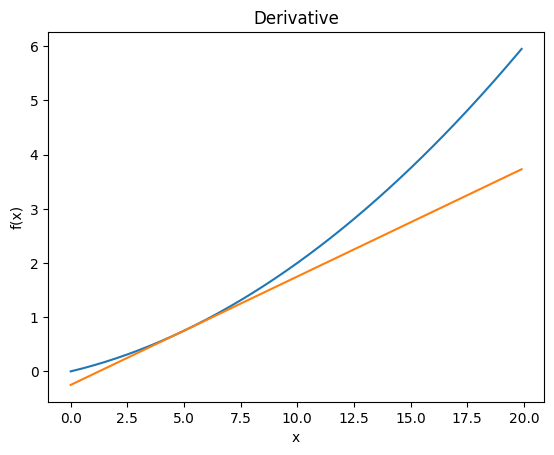

In [15]:
import numpy as np
import matplotlib.pylab as plt

# 数值微分求导数
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)


def function_1(x):
    return 0.01*x**2 + 0.1*x 

# 求函数 f 在 x 点的切线函数
def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.title("Derivative")
plt.plot(x, y)
plt.plot(x, y2)
plt.show()

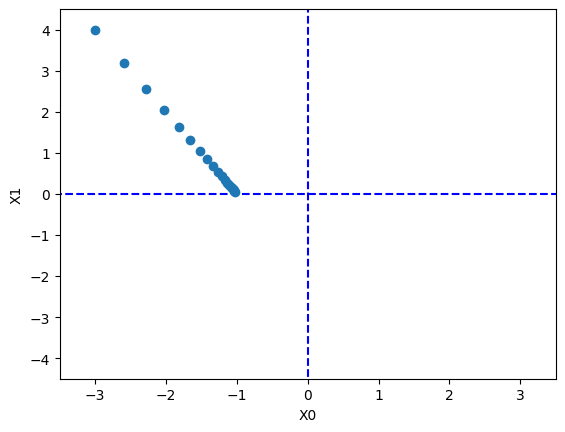

In [18]:
# 求两个变量的函数的，两个偏导数，组成的梯度

'''
例如

y = X1^2 + X2^2  在 点 (3, 4) 时的梯度

很显然 (3, 4) 时的梯度 为 (6, 8)

至于朝 (6, 8) 这个方向走多少路，则取决于学习率 learning rate



'''


import numpy as np
import matplotlib.pylab as plt

# 求多个 x 变量的导数
def _numerical_gradient_no_batch(f, x):
    h = 1e-4  # 0.0001
    grad = np.zeros_like(x)  # 生成和x形状相同的数组
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h # 其他 x 变量不动，仅仅略微改变当前 x 的值
        fxh1 = f(x)  # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x)  # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val  # 値を元に戻す
        
    return grad


# 带批量的 x 求导数处理方法
def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        # 对于二维矩阵，遍历矩阵的每一行，每次处理一行 x
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad

'''
梯度下降

f           函数
init_x      起始点
lr          学习率，乘以梯度就是每次往前走多少路
step_num    一共走几次

'''
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []  # 保存每次走的历史 x 值

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad # 朝梯度的相反方向走，损失函数越来越小

    # 返回两个值，一个是最后的 x 值，以及 x_history 的历史值
    return x, np.array(x_history)

# 函数是 y = x0 平方 + x1 平方
def function_2(x):
    return (x[0]+1)**2 + x[1]**2

# 起始点是 [-3, 4]
init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

In [33]:

# 神经网络的梯度
'''

# 有一个只有一个形状为 2x3 的权重 W 的神经网络
# 损失函数用 L 表示

     W11  W12  W13
W =  W21  W22  W23

相应的偏导数矩阵也是一样的形状

'''

def softmax(x):
    x = x - np.max(x, axis=-1, keepdims=True)   # 防止溢出
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

'''
实现的要点是，由于one-hot表示中t为0的元素的交叉熵误差也为0，因
此针对这些元素的计算可以忽略。换言之，如果可以获得神经网络在正确
解标签处的输出，就可以计算交叉熵误差。因此，t为one-hot表示时通过
t * np.log(y)计算的地方，在t为标签形式时，可用np.log( y[np.arange 
(batch_size), t] )实现相同的处理（为了便于观察，这里省略了微小值1e-7）。

'''


def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 如果训练数据是 one-hot-vector，像[0,0,1,0,0,0,0,0,0,0]这样，
    # 则将其转换为正确标签的索引 2
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size



class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)   # 用高斯分布进行初始化

    def predict(self, x):
        return np.dot(x, self.W)
    '''
    x   
    '''
    def loss(self, x, t):
        z = self.predict(x) # 由输入点积 W矩阵，得到答案 z
        y = softmax(z)      # 再经过 softmax 函数得到最终答案 y
        loss = cross_entropy_error(y, t) # 计算答案 y 和 标签 t 的交叉熵损失函数

        return loss
    
x = np.array([0.6, 0.9])        # 输入
t = np.array([  0,   0,   1])   # 答案

# 初始化网络，参数 W 矩阵
net = simpleNet()

print(net.W) # 权重参数

print("print net.W[1]")
for idx, x in enumerate(net.W):
    print(idx)
    print(x)

print()
# 由输入推理出结果
x = np.array([0.6, 0.9])
p = net.predict(x)

print('predict p is')
print(p)

print()

print(np.argmax(p)) # 最大值索引

t = np.array([0, 0, 1])     # 正确解标签

print('loss is ')
print(net.loss(x,t))


[[ 0.11838569  0.32757506 -0.28835122]
 [ 1.03142705  1.49112409 -0.25033289]]
print net.W[1]
0
[ 0.11838569  0.32757506 -0.28835122]
1
[ 1.03142705  1.49112409 -0.25033289]

predict p is
[ 0.99931576  1.53855672 -0.39831033]

1
loss is 
2.483451764390329


In [28]:
# 求梯度

'''
这里定义的函数f(W)的参数W是一个伪参数。
因为numerical_gradient(f, x)会在内部执行f(x),为了与之兼容而定义了f(W)）。
'''
def f(W):
    return net.loss(x, t)
# 这里的意思是每次略微改变 W 矩阵中某一个 W 的值，得到函数 f 的差分，再除以 W 的差值
dW = numerical_gradient(f, net.W)

print(dW)

[[ 0.30119084  0.08464162 -0.38583245]
 [ 0.45178625  0.12696243 -0.57874868]]


In [ ]:
'''
下面，我们来实现手写数字识别的神经网络。这里以2层神经网络（隐
藏层为1层的网络）为对象，使用MNIST数据集进行学习。

'''


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 初始化权重
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
    

    # x:入力データ, t:教師データ
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x:入力データ, t:教師データ
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        dz1 = np.dot(dy, W2.T)
        da1 = sigmoid_grad(a1) * dz1
        grads['W1'] = np.dot(x.T, da1)
        grads['b1'] = np.sum(da1, axis=0)

        return grads